In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import cv2
import time
import shutil
import random
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report,f1_score

from imblearn.over_sampling import RandomOverSampler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Input, Lambda,Flatten,Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
base_dir = '/content/drive/My Drive/my_dataset/dataset'  # Change to your
val_dir = '/content/drive/My Drive/my_dataset/val'  # Change to your dataset directory

# Data generators with data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2,  # Using 20% of data for validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(456, 456),  # EfficientNet B5 standard input size
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Set as training data
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(456, 456),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Set as validation data
    shuffle=True
)

Found 82 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [46]:
dataset = {
             "train_data" : "/content/drive/My Drive/my_dataset/dataset",
              "test_data" : "/content/drive/My Drive/my_dataset/val"
          }

all_data = []
for path in dataset.values():
    data = {"imgpath": [] , "labels": [] }
    category = os.listdir(path)

    for folder in category:
        folderpath = os.path.join(path , folder)
        filelist = os.listdir(folderpath)
        for file in filelist:
            fpath = os.path.join(folderpath, file)
            data["imgpath"].append(fpath)
            data["labels"].append(folder)


    all_data.append(data.copy())
    data.clear()



train_df = pd.DataFrame(all_data[0] , index=range(len(all_data[0]['imgpath'])))
#test_df = pd.DataFrame(all_data[1] , index=range(len(all_data[1]['imgpath'])))


# #Convert labels to numbers
lb = LabelEncoder()
train_df['encoded_labels'] = lb.fit_transform(train_df['labels'])
#test_df['encoded_labels'] = lb.fit_transform(test_df['labels'])

In [47]:
train_df , test_df = train_test_split(train_df ,  train_size= 0.80 , shuffle=True, random_state=124)
test_df , valid_df = train_test_split(train_df ,  train_size= 0.50 , shuffle=True, random_state=124)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

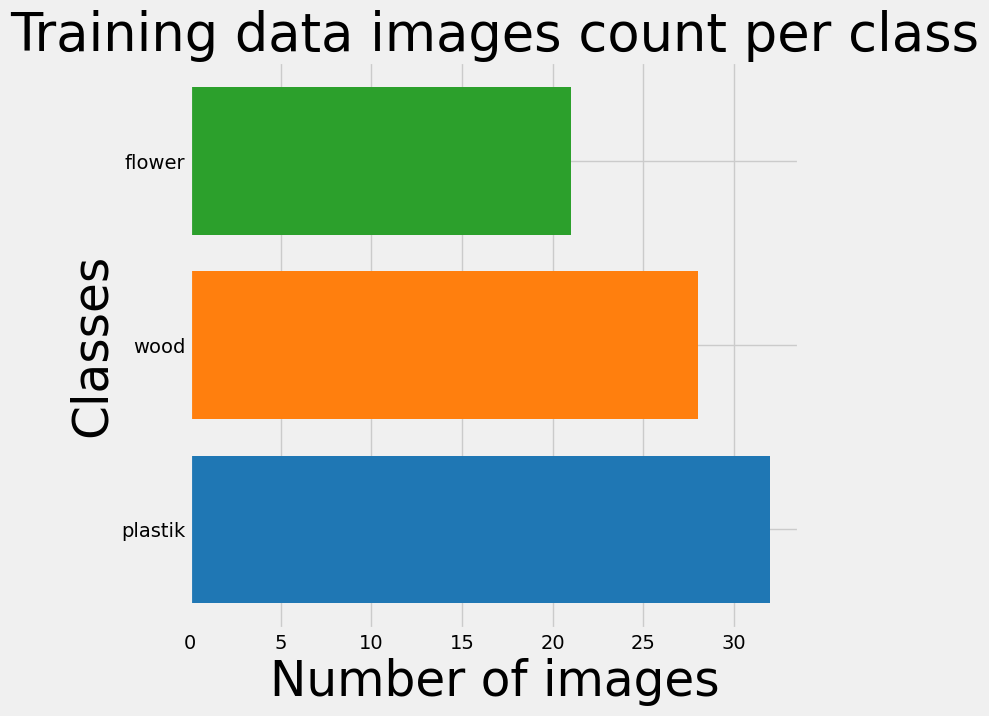

In [48]:
train  = train_df["labels"].value_counts()
label = train.tolist()
index = train.index.tolist()

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#5254a3", "#6b6ecf", "#bdbdbd", "#8ca252", "#bd9e39",
    "#ad494a", "#8c6d31", "#6b6ecf", "#e7ba52", "#ce6dbd",
    "#9c9ede", "#cedb9c", "#de9ed6", "#ad494a", "#d6616b",
    "#f7f7f7", "#7b4173", "#a55194", "#ce6dbd"
]



plt.figure(figsize=(7,7))
plt.title("Training data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)
plt.barh(index,label, color=colors)
plt.grid(True)
plt.show()

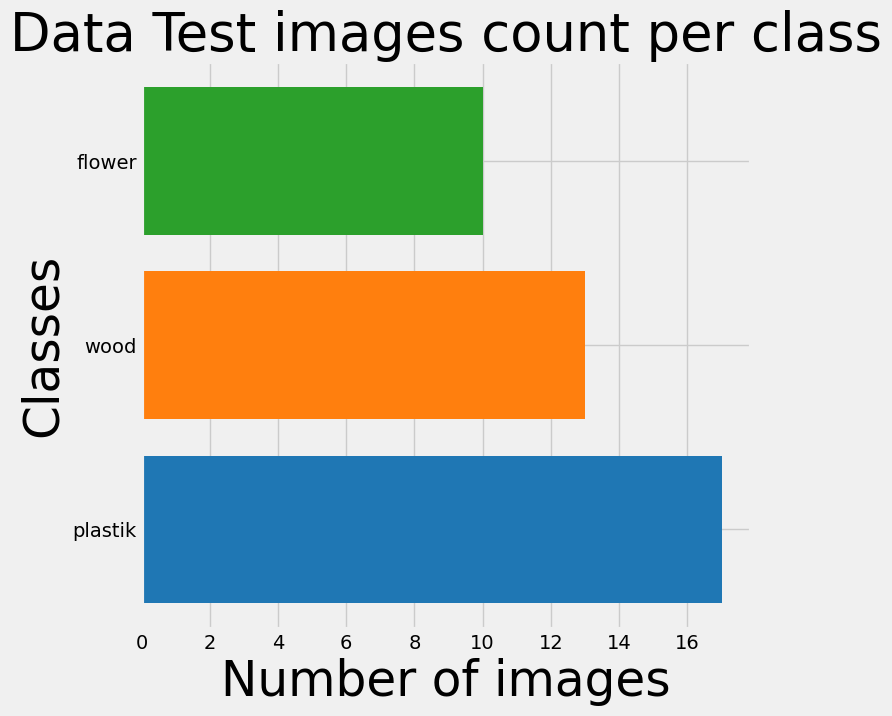

In [49]:
test  = test_df["labels"].value_counts()
label = test.tolist()
index = test.index.tolist()

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#5254a3", "#6b6ecf", "#bdbdbd", "#8ca252", "#bd9e39",
    "#ad494a", "#8c6d31", "#6b6ecf", "#e7ba52", "#ce6dbd",
    "#9c9ede", "#cedb9c", "#de9ed6", "#ad494a", "#d6616b",
    "#f7f7f7", "#7b4173", "#a55194", "#ce6dbd"
]



plt.figure(figsize=(7,7))
plt.title("Data Test images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)
plt.barh(index,label, color=colors)
plt.grid(True)
plt.show()

In [50]:
train_df.sample(n=15, random_state=1)

,imgpath,labels,encoded_labels
88,/content/drive/My Drive/my_dataset/dataset/woo...,wood,2
87,/content/drive/My Drive/my_dataset/dataset/woo...,wood,2
32,/content/drive/My Drive/my_dataset/dataset/pla...,plastik,1
91,/content/drive/My Drive/my_dataset/dataset/woo...,wood,2
92,/content/drive/My Drive/my_dataset/dataset/woo...,wood,2
69,/content/drive/My Drive/my_dataset/dataset/woo...,wood,2
42,/content/drive/My Drive/my_dataset/dataset/pla...,plastik,1
66,/content/drive/My Drive/my_dataset/dataset/woo...,wood,2
3,/content/drive/My Drive/my_dataset/dataset/flo...,flower,0
64,/content/drive/My Drive/my_dataset/dataset/pla...,plastik,1


In [51]:
print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("--------Validation----------")
print(valid_df[["imgpath", "labels"]].head(5))
print(valid_df.shape)
print("----------Test--------------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

----------Train-------------
                                              imgpath   labels
84  /content/drive/My Drive/my_dataset/dataset/woo...     wood
79  /content/drive/My Drive/my_dataset/dataset/woo...     wood
19  /content/drive/My Drive/my_dataset/dataset/flo...   flower
99  /content/drive/My Drive/my_dataset/dataset/woo...     wood
56  /content/drive/My Drive/my_dataset/dataset/pla...  plastik
(81, 3)
--------Validation----------
                                             imgpath   labels
0  /content/drive/My Drive/my_dataset/dataset/flo...   flower
1  /content/drive/My Drive/my_dataset/dataset/flo...   flower
2  /content/drive/My Drive/my_dataset/dataset/flo...   flower
3  /content/drive/My Drive/my_dataset/dataset/woo...     wood
4  /content/drive/My Drive/my_dataset/dataset/pla...  plastik
(41, 3)
----------Test--------------
                                             imgpath   labels
0  /content/drive/My Drive/my_dataset/dataset/woo...     wood
1  /content/drive/My Dr

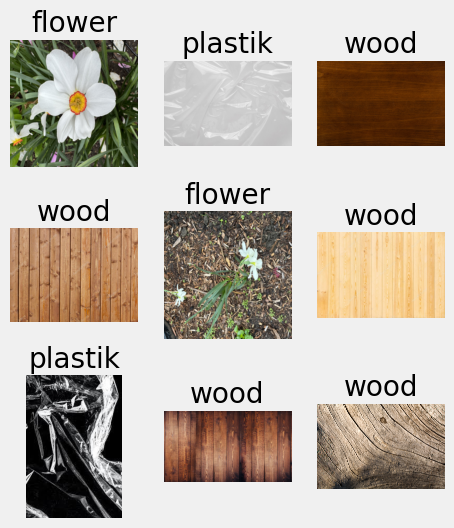

In [52]:
plt.figure(figsize=(5,6))
for i, row in valid_df.sample(n=9).reset_index().iterrows():
    plt.subplot(3,3,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [53]:
def build_model(num_classes):
    base_model = tf.keras.applications.EfficientNetB5(include_top=False, weights='imagenet', input_tensor=Input(shape=(456, 456, 3)))
    base_model.trainable = False  # Freeze the base model

    # Create new model on top
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.2)(x)  # Regularize with dropout
    x = Dense(num_classes, activation='softmax')(x)  # Final layer with softmax activation for N classes

    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
num_classes = train_generator.num_classes
model = build_model(num_classes)

In [54]:
print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 456, 456, 3)]        0         []                            
                                                                                                  
 rescaling_10 (Rescaling)    (None, 456, 456, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_5 (Normaliza  (None, 456, 456, 3)          7         ['rescaling_10[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_11 (Rescaling)    (None, 456, 456, 3)          0         ['normalization_5[0][0]'

In [55]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=10,  # You can adjust epochs based on your dataset size and training needs
    verbose=1
)

Epoch 1/10
3/3 [==============================] - 26s 4s/step - loss: 0.9804 - accuracy: 0.5610 - val_loss: 0.8538 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 0.6680 - accuracy: 0.9024 - val_loss: 0.5712 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 7s 3s/step - loss: 0.4593 - accuracy: 1.0000 - val_loss: 0.5731 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.3406 - accuracy: 1.0000 - val_loss: 0.5709 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 8s 3s/step - loss: 0.2523 - accuracy: 1.0000 - val_loss: 0.4067 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.1917 - accuracy: 1.0000 - val_loss: 0.2187 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 0.1614 - accuracy: 1.0000 - val_loss: 0.2303 - val_accuracy: 1.0000
Epoch 8/10
3/3 [========================

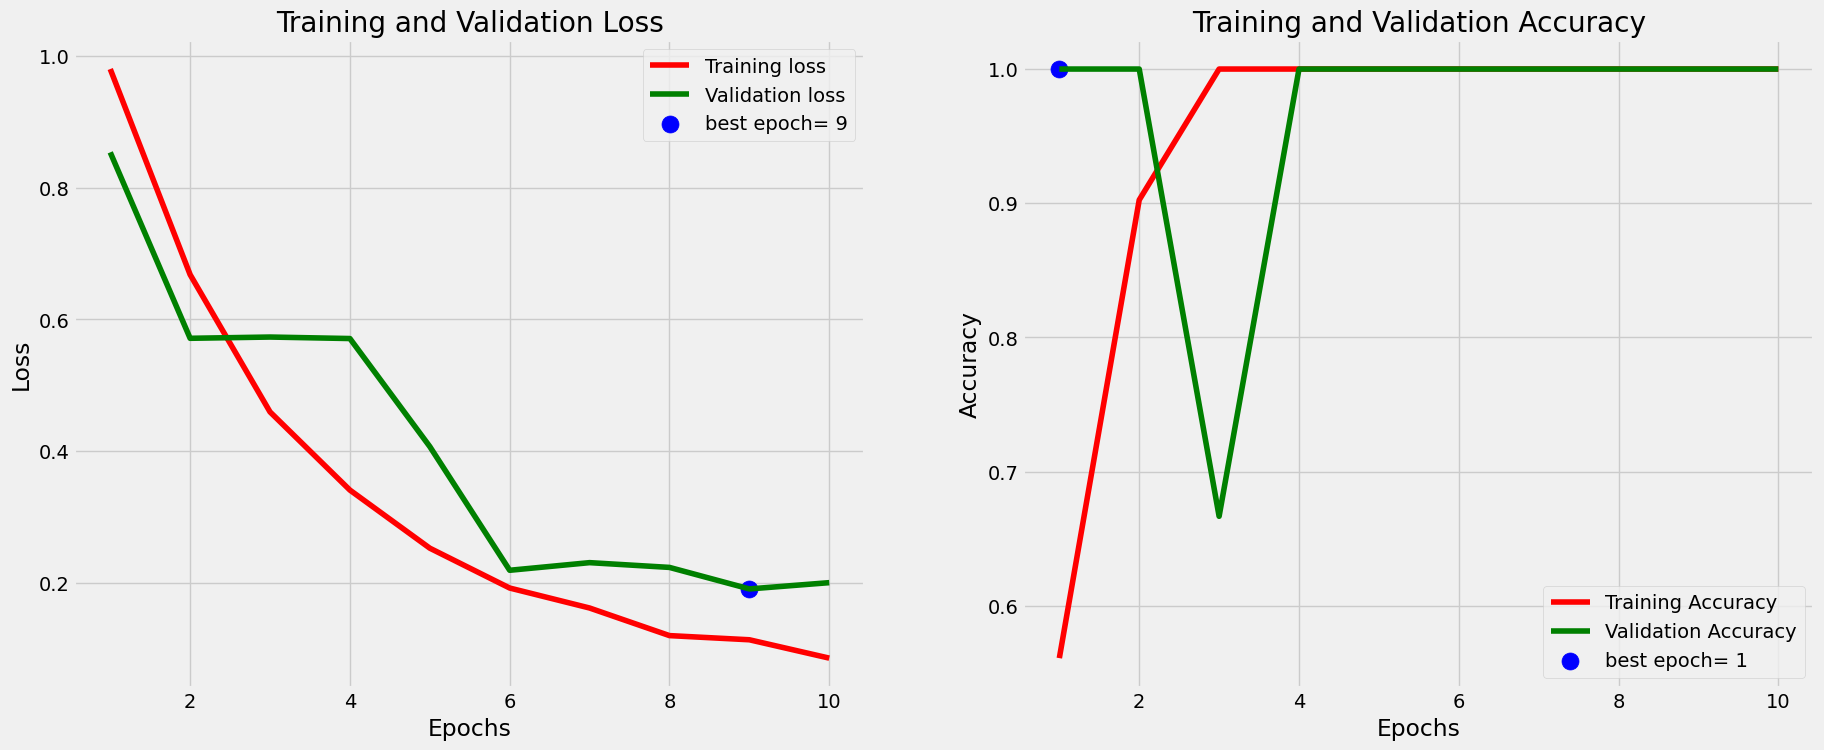

In [56]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

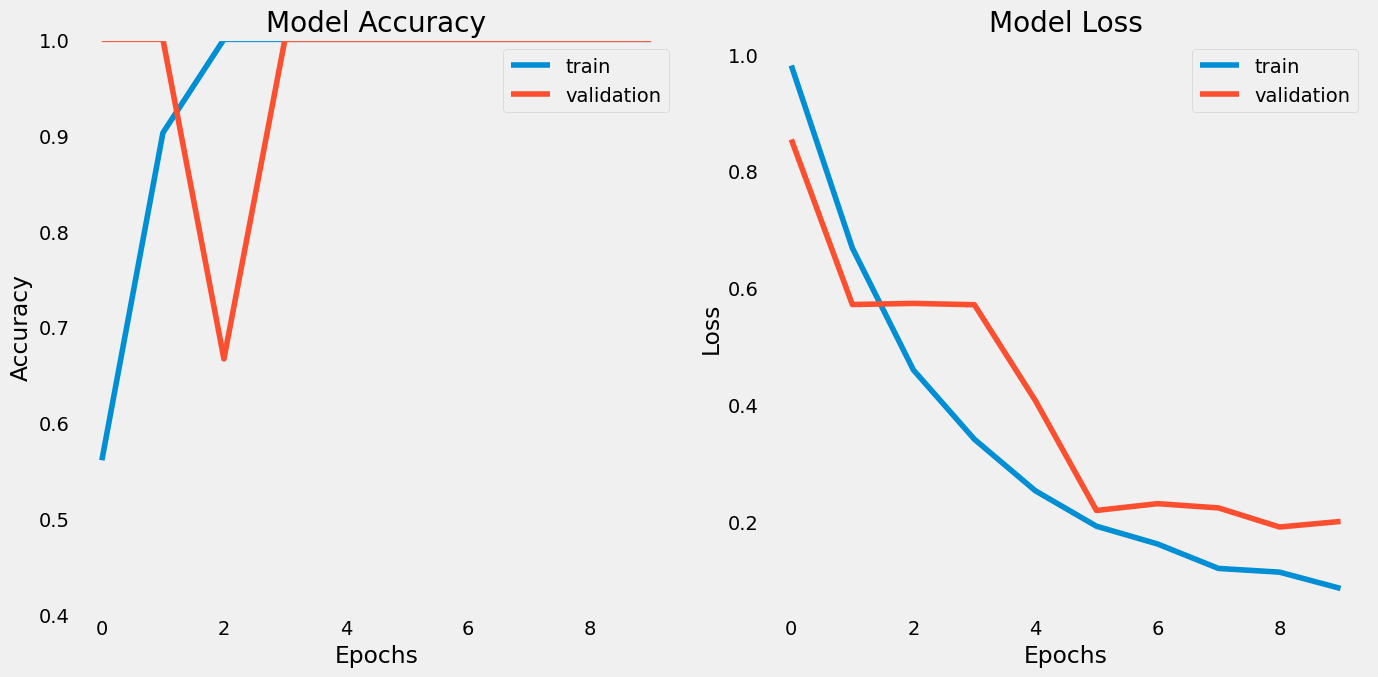

In [57]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
fig2 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])


plt.tight_layout()
plt.show()


In [58]:
results = model.evaluate(validation_generator, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.33017
Test Accuracy: 100.00%


In [38]:
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis = 1)
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score:", f1)
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

1/1 [==============================] - 3s 3s/step
F1 Score: 0.0
              precision    recall  f1-score   support

      flower       0.00      0.00      0.00       1.0
     plastik       0.00      0.00      0.00       1.0
        wood       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



In [61]:
train_score = model.evaluate(train_generator , steps= 32 , verbose = 1)
val_score = model.evaluate(validation_generator , steps = 32 , verbose = 1)
test_score = model.evaluate(validation_generator , steps = 32 , verbose = 1)

print(f'Train loss = {train_score[0] }')
print(f'Train Accuracy = {train_score[1]}')
print(f'Validation loss = {val_score[0]}')
print(f'Validation Accuracy = {val_score[1]}')
print(f'Test loss = {test_score[0]}')
print(f'Test Accuracy = {test_score[1]}')

 3/32 [=>............................] - ETA: 1:38 - loss: 0.0720 - accuracy: 1.0000

 1/32 [..............................] - ETA: 11s - loss: 0.1583 - accuracy: 1.0000

 1/32 [..............................] - ETA: 11s - loss: 0.1771 - accuracy: 1.0000

32/32 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 1.0000
Train loss = 0.07198568433523178
Train Accuracy = 1.0
Validation loss = 0.15834331512451172
Validation Accuracy = 1.0
Test loss = 0.17713533341884613
Test Accuracy = 1.0


In [63]:
# Make predictions on the test set
preds = model.predict(validation_generator)

# Convert the predictions to binary classes (0 or 1)
predicted_classes = (preds > 0.5).astype(int)

1/1 [==============================] - 4s 4s/step


In [66]:
classes = dict(zip(train_generator.class_indices.values(), validation_generator.class_indices.keys()))
Predictions = pd.DataFrame({"Image Index" : list(range(len(validation_generator.labels))),
                            "Test Labels" : validation_generator.labels,
                            "Test Classes" : [classes[i] for i in validation_generator.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": validation_generator.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(validation_generator), axis = 1))]
                           })
Predictions.head(8)

1/1 [==============================] - 0s 187ms/step


,Image Index,Test Labels,Test Classes,Prediction Labels,Prediction Classes,Path,Prediction Probability
0,0,0,flower,1,plastik,flower/01.png,0.979628
1,1,1,plastik,2,wood,plastik/37.jpg,0.868486
2,2,2,wood,0,flower,wood/38.jpg,0.546281


In [45]:
model.save('/content/drive/My Drive/training_efb52507.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Image shape for prediction: (1, 456, 456, 3)


1/1 [==============================] - 3s 3s/step
The predicted class is: wood
The predicted probability is: 92.41931438446045


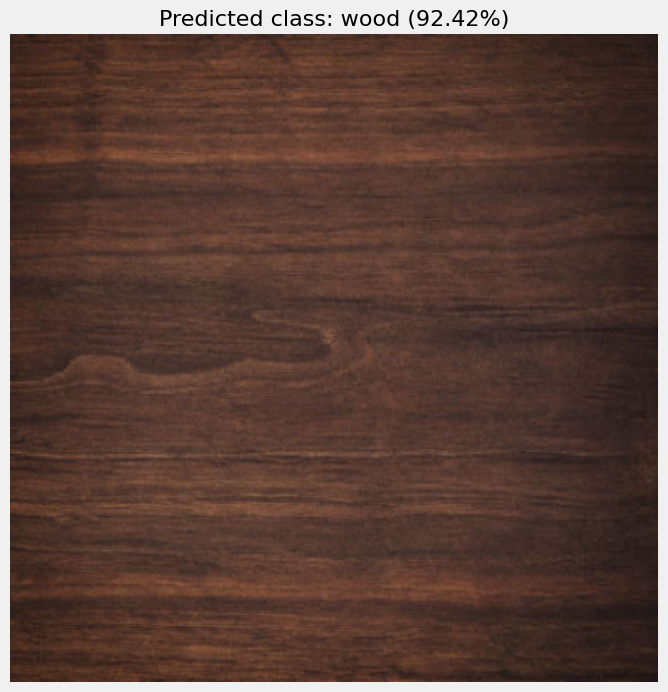

In [67]:
import cv2
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Define the image URL
image_url = "https://www.arch2o.com/wp-content/uploads/2020/07/Arch2O-65-types-of-wood-every-designer-needs-to-know-about-12-700x467.jpg"

# Function to load an image from a URL
def load_image_from_url(url, img_height, img_width):
    response = requests.get(url)
    image = np.asarray(bytearray(response.content), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image_resized = cv2.resize(image, (img_height, img_width))
    return image_resized

img_height, img_width = 456, 456  # Model's expected input dimensions

# Load and process the image
image_resized = load_image_from_url(image_url, img_height, img_width)
image = np.expand_dims(image_resized, axis=0)  # Add batch dimension for model prediction
print("Image shape for prediction:", image.shape)

# Assuming 'model' and 'classes' are defined elsewhere in your script
pred = model.predict(image)
predicted_class_index = np.argmax(pred)
predicted_class = classes[predicted_class_index]
predicted_probability = pred[0][predicted_class_index] * 100  # Convert to percentage
print("The predicted class is:", predicted_class)
print("The predicted probability is:", predicted_probability)

# Display the image with the predicted label and probability
plt.figure(figsize=(8, 8))  # Set the figure size
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying correctly
plt.title(f'Predicted class: {predicted_class} ({predicted_probability:.2f}%)', fontsize=16)  # Set title with predicted class and probability
plt.axis('off')  # Hide axes
plt.show()  # Show the image plot
